In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data=pd.read_csv("/content/IMDb Movies India.csv",encoding="latin-1")

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data1=data.drop(columns=['Actor 2','Actor 3'],axis=1)

In [ ]:
data1.shape

(15509, 8)

In [ ]:
data1=data1.dropna(how='any')
data1.shape


(5746, 8)

In [ ]:
#data=data.dropna(how='any')

In [ ]:
data.shape

(15509, 10)

In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data1.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

<ipython-input-22-132eaa20d94c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Rating)


<Axes: xlabel='Rating', ylabel='Density'>

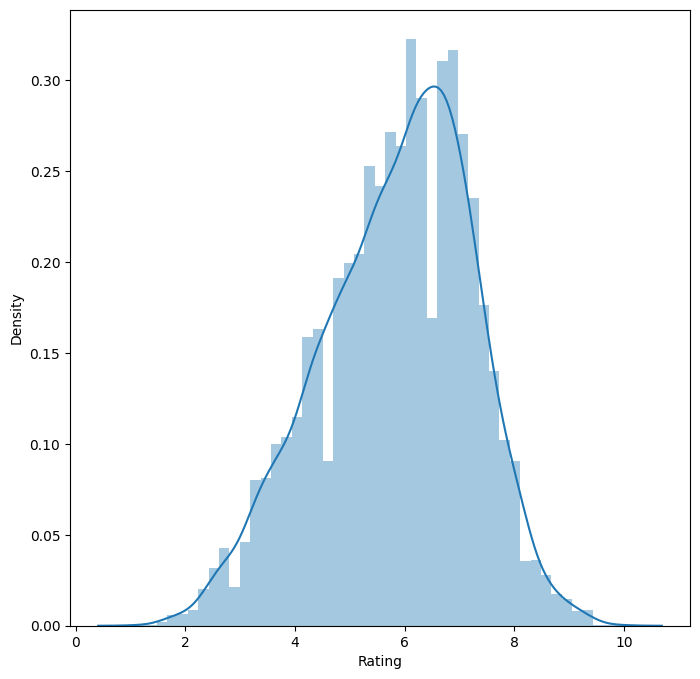

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(data.Rating)

Convert data in numarical form


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5746 non-null   object 
 1   Year      5746 non-null   object 
 2   Duration  5746 non-null   object 
 3   Genre     5746 non-null   object 
 4   Rating    5746 non-null   float64
 5   Votes     5746 non-null   object 
 6   Director  5746 non-null   object 
 7   Actor 1   5746 non-null   object 
dtypes: float64(1), object(7)
memory usage: 404.0+ KB


In [ ]:
data1['Duration']

1        109 min
3        110 min
5        147 min
6        142 min
8         82 min
          ...   
15493    115 min
15494    153 min
15503    125 min
15505    129 min
15508    130 min
Name: Duration, Length: 5746, dtype: object

In [ ]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [ ]:
data['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [ ]:
def extract_min(Duration):
  minitue=float(Duration.split()[0])
  return minitue

In [ ]:
data1['Duration']=data1['Duration'].apply(extract_min)

In [ ]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5746 non-null   object 
 1   Year      5746 non-null   object 
 2   Duration  5746 non-null   float64
 3   Genre     5746 non-null   object 
 4   Rating    5746 non-null   float64
 5   Votes     5746 non-null   object 
 6   Director  5746 non-null   object 
 7   Actor 1   5746 non-null   object 
dtypes: float64(2), object(6)
memory usage: 404.0+ KB


In [ ]:
# Remove parentheses using the 'str' accessor and slicing
data1['Year'] = data1['Year'].str[1:-1]

# Convert to integer data type
data1['Year'] = pd.to_numeric(data1['Year'])  # Handle potential conversion errors




In [ ]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5746 non-null   object 
 1   Year      5746 non-null   int64  
 2   Duration  5746 non-null   float64
 3   Genre     5746 non-null   object 
 4   Rating    5746 non-null   float64
 5   Votes     5746 non-null   object 
 6   Director  5746 non-null   object 
 7   Actor 1   5746 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 404.0+ KB


In [ ]:
data1['Votes']

1            8
3           35
5          827
6        1,086
8          326
         ...  
15493      408
15494    1,496
15503       44
15505      655
15508       20
Name: Votes, Length: 5746, dtype: object

In [ ]:
data1['Votes']=data1['Votes'].str.replace(',','')
data1['Votes']=pd.to_numeric(data1['Votes'])

In [ ]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5746 non-null   object 
 1   Year      5746 non-null   int64  
 2   Duration  5746 non-null   float64
 3   Genre     5746 non-null   object 
 4   Rating    5746 non-null   float64
 5   Votes     5746 non-null   int64  
 6   Director  5746 non-null   object 
 7   Actor 1   5746 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 404.0+ KB


<ipython-input-38-4c7e271da0cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1.Votes)


<Axes: xlabel='Votes', ylabel='Density'>

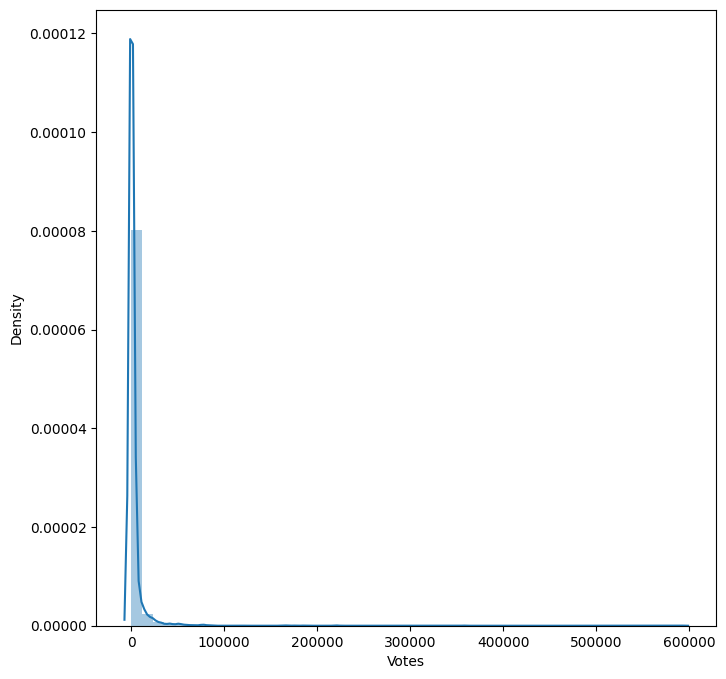

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(data1.Votes)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vector=TfidfVectorizer()

In [ ]:
data1_num=data1.select_dtypes(include=[np.number])
data1_cat=data1.select_dtypes(include=[object])

In [ ]:
print(data1_num)

       Year  Duration  Rating  Votes
1      2019     109.0     7.0      8
3      2019     110.0     4.4     35
5      1997     147.0     4.7    827
6      2005     142.0     7.4   1086
8      2012      82.0     5.6    326
...     ...       ...     ...    ...
15493  2015     115.0     6.1    408
15494  2001     153.0     6.2   1496
15503  1989     125.0     5.8     44
15505  1999     129.0     4.5    655
15508  1998     130.0     6.2     20

[5746 rows x 4 columns]


In [ ]:
print(data1_cat)
data1_cat=data1_cat['Name']+' '+data1_cat['Genre']+' '+data1_cat['Director']+' '+data1_cat['Actor 1']

                                     Name                      Genre  \
1      #Gadhvi (He thought he was Gandhi)                      Drama   
3                                 #Yaaram            Comedy, Romance   
5                    ...Aur Pyaar Ho Gaya     Comedy, Drama, Musical   
6                               ...Yahaan        Drama, Romance, War   
8                      ?: A Question Mark  Horror, Mystery, Thriller   
...                                   ...                        ...   
15493                              Zubaan                      Drama   
15494                            Zubeidaa  Biography, Drama, History   
15503                     Zulm Ki Zanjeer       Action, Crime, Drama   
15505                               Zulmi              Action, Drama   
15508                        Zulm-O-Sitam              Action, Drama   

              Director          Actor 1  
1        Gaurav Bakshi     Rasika Dugal  
3           Ovais Khan          Prateik  
5        

In [ ]:
port_stem=PorterStemmer()

In [ ]:

def stemming(content):
  stemmed_content=re.sub('^[a-zA-Z]',' ', content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [ ]:
data1_cat=data1_cat.apply(stemming)

In [ ]:
vector.fit(data1_cat)

TfidfVectorizer()

In [ ]:
data1_cat_tfidf=vector.transform(data1_cat)
print(data1_cat_tfidf)

  (0, 8881)	0.39266359417101354
  (0, 7523)	0.37490098062993793
  (0, 4029)	0.39266359417101354
  (0, 3510)	0.3106636932454384
  (0, 3479)	0.33778255996370565
  (0, 3461)	0.3267729786764812
  (0, 2983)	0.37490098062993793
  (0, 2966)	0.06157442036353276
  (0, 1818)	0.2989115857876533
  (1, 9621)	0.5666035503809834
  (1, 7737)	0.1592453987594835
  (1, 7191)	0.49715607120445704
  (1, 6842)	0.5666035503809834
  (1, 5253)	0.23868907914520227
  (1, 2557)	0.16859745172043988
  (2, 7567)	0.3684912639126479
  (2, 7375)	0.31217960278632645
  (2, 7283)	0.35911513191590233
  (2, 6214)	0.23507799452667363
  (2, 4165)	0.33781577373693555
  (2, 3521)	0.3767195782814709
  (2, 2966)	0.07888847599226524
  (2, 2764)	0.2926304277548167
  (2, 2557)	0.14969441110445367
  (2, 2203)	0.3613164464439077
  :	:
  (5742, 4152)	0.31316613269546734
  (5742, 2966)	0.08423337670885493
  (5742, 2167)	0.2975527572285392
  (5742, 1985)	0.3857965813333563
  (5743, 9717)	0.5072503382753729
  (5743, 9136)	0.507250338275372

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler_num=scaler.fit_transform(data1_num)
print(scaler_num)

[[ 1.14352615 -0.91899107  0.78575007 -0.19557422]
 [ 1.14352615 -0.88037241 -1.09125532 -0.19358165]
 [ 0.02705249  0.54851807 -0.87467778 -0.13513294]
 ...
 [-0.37893794 -0.30109248 -0.08056011 -0.19291746]
 [ 0.12855009 -0.14661784 -1.01906281 -0.14782635]
 [ 0.07780129 -0.10799918  0.20820995 -0.19468863]]


In [ ]:
x=data1_cat_tfidf
y=data1['Rating']


In [ ]:
print(x)
print(y)

  (0, 8881)	0.39266359417101354
  (0, 7523)	0.37490098062993793
  (0, 4029)	0.39266359417101354
  (0, 3510)	0.3106636932454384
  (0, 3479)	0.33778255996370565
  (0, 3461)	0.3267729786764812
  (0, 2983)	0.37490098062993793
  (0, 2966)	0.06157442036353276
  (0, 1818)	0.2989115857876533
  (1, 9621)	0.5666035503809834
  (1, 7737)	0.1592453987594835
  (1, 7191)	0.49715607120445704
  (1, 6842)	0.5666035503809834
  (1, 5253)	0.23868907914520227
  (1, 2557)	0.16859745172043988
  (2, 7567)	0.3684912639126479
  (2, 7375)	0.31217960278632645
  (2, 7283)	0.35911513191590233
  (2, 6214)	0.23507799452667363
  (2, 4165)	0.33781577373693555
  (2, 3521)	0.3767195782814709
  (2, 2966)	0.07888847599226524
  (2, 2764)	0.2926304277548167
  (2, 2557)	0.14969441110445367
  (2, 2203)	0.3613164464439077
  :	:
  (5742, 4152)	0.31316613269546734
  (5742, 2966)	0.08423337670885493
  (5742, 2167)	0.2975527572285392
  (5742, 1985)	0.3857965813333563
  (5743, 9717)	0.5072503382753729
  (5743, 9136)	0.507250338275372

In [ ]:
x.shape

(5746, 9753)

In [ ]:
y.shape

(5746,)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5746 non-null   object 
 1   Year      5746 non-null   int64  
 2   Duration  5746 non-null   float64
 3   Genre     5746 non-null   object 
 4   Rating    5746 non-null   float64
 5   Votes     5746 non-null   int64  
 6   Director  5746 non-null   object 
 7   Actor 1   5746 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 404.0+ KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train,x_train.shape)

  (0, 8587)	0.3013590016842425
  (0, 7644)	0.4001931155432353
  (0, 6045)	0.44416973888358774
  (0, 5112)	0.18539122622764623
  (0, 2966)	0.0729512474702623
  (0, 2466)	0.4652142701760183
  (0, 2333)	0.3680636184988904
  (0, 380)	0.4001931155432353
  (1, 7188)	0.538212118528396
  (1, 4759)	0.42212575763926635
  (1, 4240)	0.2725344374332411
  (1, 3692)	0.538212118528396
  (1, 2051)	0.41011005363045383
  (2, 9554)	0.34649333356275297
  (2, 9143)	0.282660983207366
  (2, 8994)	0.3369065926845964
  (2, 5198)	0.31406387085686016
  (2, 4992)	0.39733231778920347
  (2, 3571)	0.42255508981132106
  (2, 3332)	0.24700451160597703
  (2, 2966)	0.06940121811117742
  (2, 2557)	0.13169191500293467
  (2, 1614)	0.2514292447123085
  (2, 1382)	0.3241758984084385
  (3, 8424)	0.21755758588021806
  :	:
  (4592, 2681)	0.3518884200806681
  (4592, 2585)	0.13945109010283205
  (4592, 426)	0.37380031630647065
  (4593, 7737)	0.1555654958829763
  (4593, 7689)	0.4761483259870423
  (4593, 5675)	0.5535102613369759
  (459

In [ ]:
print(y_train,y_train.shape)

8488     4.6
109      4.2
5898     4.7
10302    8.0
12165    8.6
        ... 
10105    3.9
14078    4.4
14169    7.8
14563    4.5
2170     4.9
Name: Rating, Length: 4596, dtype: float64 (4596,)


In [ ]:
print(x_test,x_test.shape)

  (0, 9649)	0.5320769697585813
  (0, 8520)	0.3897335435359185
  (0, 5571)	0.4257148676642807
  (0, 4857)	0.3061065583674071
  (0, 2966)	0.08343613079495443
  (0, 1201)	0.5320769697585813
  (1, 7992)	0.31866279763798266
  (1, 7445)	0.3007662489703409
  (1, 5451)	0.1901867229185827
  (1, 3861)	0.5135239607983667
  (1, 2966)	0.0805267936685105
  (1, 2147)	0.5135239607983667
  (1, 1614)	0.291735382493476
  (1, 1557)	0.3909154394266169
  (2, 9323)	0.3558416285365324
  (2, 8843)	0.40554896496322373
  (2, 8387)	0.3872034660589183
  (2, 8256)	0.21632973308518025
  (2, 7947)	0.311463452396066
  (2, 5460)	0.2830216968860118
  (2, 5299)	0.33272903331270326
  (2, 5112)	0.16161417379014995
  (2, 2556)	0.18377491130305562
  (2, 2463)	0.40554896496322373
  (3, 9407)	0.4535330234621339
  :	:
  (1146, 367)	0.13364777775994213
  (1147, 8297)	0.42939337345118345
  (1147, 6959)	0.40996924383250954
  (1147, 5575)	0.385497734619629
  (1147, 2966)	0.06733409582830725
  (1147, 2641)	0.37676347492471224
  (114

In [ ]:
print(y_test,y_test.shape)

10282    5.7
2829     4.8
8396     6.6
13429    8.5
3091     6.1
        ... 
15248    5.2
3621     6.0
1659     5.9
3426     5.4
3396     6.1
Name: Rating, Length: 1150, dtype: float64 (1150,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear=LinearRegression()

In [ ]:
linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
train_prediction=linear.predict(x_train)
train_accuracy1=metrics.r2_score(train_prediction,y_train)
print(train_accuracy1)
train_accuracy2=metrics.mean_absolute_error(train_prediction,y_train)
print(train_accuracy2)

0.9993149580616845
0.0013316871207803447


In [ ]:
test_prediction=linear.predict(x_test)
test_accuracy1=metrics.r2_score(test_prediction,y_test)
print(test_accuracy1)
test_accuracy2=metrics.mean_absolute_error(test_prediction,y_test)
print(test_accuracy2)

-0.27297372422987154
1.520098458218155


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [ ]:
cross_val=cross_val_score(XGBRegressor(),x,y,cv=5)

In [ ]:
print(cross_val)

[0.17827636 0.16982865 0.20493898 0.15628494 0.15306682]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [ ]:
# list of models
models=[SVR(kernel='linear'),RandomForestRegressor(),XGBRegressor()]


In [ ]:

for model in models:
  model.fit(x_train,y_train)
  prediction=model.predict(x_train)
  r2_accuracy=metrics.r2_score(y_train,prediction)
  mean_accuracy=metrics.mean_absolute_error(y_train,prediction)
  print("Traning_r2_accuracy for ",model," model is ",r2_accuracy)
  print("Traning_mean_accuracy for ",model," model is ",mean_accuracy)

  prediction1=model.predict(x_test)
  r2_accuracy1=metrics.r2_score(y_test,prediction1)
  mean_accuracy1=metrics.mean_absolute_error(y_test,prediction1)
  print("Test_r2_accuracy for ",model," model is ",r2_accuracy1)
  print("Test_mean_accuracy for ",model," model is ",mean_accuracy1)

Traning_r2_accuracy for  SVR(kernel='linear')  model is  0.6481000981626649
Traning_mean_accuracy for  SVR(kernel='linear')  model is  0.5285823148563534
Test_r2_accuracy for  SVR(kernel='linear')  model is  0.19578006080667099
Test_mean_accuracy for  SVR(kernel='linear')  model is  0.9321312926330955
Traning_r2_accuracy for  RandomForestRegressor()  model is  0.8800473327670293
Traning_mean_accuracy for  RandomForestRegressor()  model is  0.37157758299142096
Test_r2_accuracy for  RandomForestRegressor()  model is  0.11057073708734655
Test_mean_accuracy for  RandomForestRegressor()  model is  0.9869674451345753
Traning_r2_accuracy for  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             inte

In [ ]:

for model in models:
  cross_val=cross_val_score(model,x,y,cv=5)
  accuracy=sum(cross_val)/len(cross_val)
  print(accuracy*100)


20.13730945397869
14.083919411709218
17.247914892368797
